# LangGraph 单节点实例

In [30]:
! pip install langgraph langsmith langchain-openai


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


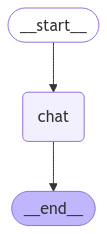

Assistant: Hello! How can I assist you today?
Assistant: Hello! I am Assistant, an AI language model created by OpenAI. I am based on the GPT-4 architecture, which stands for “Generative Pre-trained Transformer 4”. This model has been trained on a diverse range of internet text to understand and generate human-like text based on the input I receive. However, I don’t have the ability to access real-time data or personal histories, and my responses are generated based on patterns and information in the data I was trained on up until October 2023. How can I assist you today?


In [31]:
import os
from dotenv import load_dotenv
# langgraph chat
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph
from IPython.display import Image, display

# 加载 .env 文件
load_dotenv()
llm = ChatOpenAI(model="gpt-4o", openai_api_key=os.getenv("OPENAI_API_KEY"),
                 openai_api_base=os.getenv("OPENAI_API_BASE"))


# llm = ChatOpenAI(model="gpt-4o",
#                  openai_api_key="sk-bzNskWdx7jT08w7KfxA8pAnAoU8fkN6pFCdGkWCs3rKxxWyy",
#                  openai_api_base="https://sg.uiuiapi.com/v1")

class State(TypedDict):
    messages: Annotated[list, add_messages]


def chat(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


workflow = StateGraph(State)
workflow.add_node(chat)
workflow.set_entry_point("chat")
workflow.set_finish_point("chat")
graph = workflow.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)